In [28]:
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal, osr


In [7]:
# Parameters.
input_filename = "ch2_ohr_ncp_20190906T1246532096_d_img_d18.img"
shape = (63230, 12000) # matrix size - information from XML file
dtype = np.dtype(np.int8)  # unsigned integer (8bit) - information from XML file
output_filename = "ch2_ohr_ncp_20190906T1246532096_d_img_d18.PNG"

In [8]:
# Reading.
fid = open(input_filename, 'rb')
data = np.fromfile(fid, dtype)
image = data.reshape(shape)

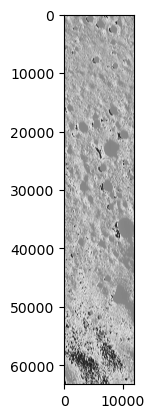

In [9]:
# Display.
plt.imshow(image, cmap = "gray")
plt.savefig(output_filename)
plt.show()


In [15]:
shape[0]

63230

In [26]:
#Export to Tiff

cols = shape[1]
rows = shape[0]

#To write:

# create the output image
driver = gdal.GetDriverByName('GTiff')
outDs = driver.Create("ch2_ohr_ncp_20190906T1246532096_d_img_d18.tif", cols, rows, 1, gdal.GDT_Byte)
export = outDs.GetRasterBand(1).WriteArray(image)
export = None

In [35]:
# Assign the four known coordinates
gdal.UseExceptions()
osr.UseExceptions()

img_path = 'ch2_ohr_ncp_20190906T1246532096_d_img_d18.tif'

#input values for geotransform
ulx = 71.334305
uly = -14.323756
xres = 0.000027 
yres = 0.000027
xrot = 0
yrot = 0
geotransform = (ulx, xres, xrot, uly, yrot, yres)


#find projection
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)

#update image georeference
ds = gdal.Open(img_path, gdal.GA_Update)
ds.SetGeoTransform(geotransform)
ds.SetProjection(srs.ExportToWkt())
ds.FlushCache()
del ds

In [37]:
srs.ImportFromWkt('IAU2000.wkt')

RuntimeError: missing [